In [1]:
import numpy as np
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# download dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings

mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
mnist['data'].shape, mnist['target'].shape

((70000, 784), (70000,))

In [4]:
X_train, X_test, y_train, y_test = \
    mnist['data'][:60000], mnist['data'][60000:], mnist['target'][:60000], mnist['target'][60000:]

### Use PCA to reduce dimension, then train a Random Forest

##### Use PCA then Forest

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1)

from sklearn.pipeline import Pipeline
pipe = Pipeline([('pca',pca),('forest',forest)])

In [6]:
%time pipe.fit(X_train,y_train)

Wall time: 12 s


Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.95,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('forest',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=-1,
                                        oob_score=False, random_state=0,
                    

In [7]:
from sklearn.metrics import accuracy_score
y_hat1 = pipe.predict(X_test)
score1 = accuracy_score(y_hat1, y_test)

In [8]:
score1

0.8931

##### Measure time after PCA

In [19]:
X_train_pca = pca.fit_transform(X_train)
pca.n_components_

154

In [17]:
%time forest.fit(X_train_pca, y_train)

Wall time: 5.07 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

##### Directly train a forest

In [12]:
dir_forest = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1)
%timeit dir_forest.fit(X_train,y_train)

2.51 s ± 111 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
y_hat2 = dir_forest.predict(X_test)
score2 = accuracy_score(y_hat2, y_test)

In [14]:
score2

0.9468

### Use t-SNE to reduce MNIST down to 2D

In [27]:
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS

tsne = TSNE(n_components=2,random_state=0,n_jobs=-1)
lle = LocallyLinearEmbedding(n_components=2,random_state=0,n_jobs=-1,n_neighbors=10)
mds = MDS(n_components=2,random_state=0,n_jobs=-1)
pca2 = PCA(n_components=2)

In [29]:
X_tsne = tsne.fit_transform(mnist['data'])

In [64]:
X_lle = lle.fit_transform(X_test)
X_mds = mds.fit_transform(X_test)
X_pca2 = pca2.fit_transform(X_test)

In [50]:
X_pca2[:,1].shape

(70000,)

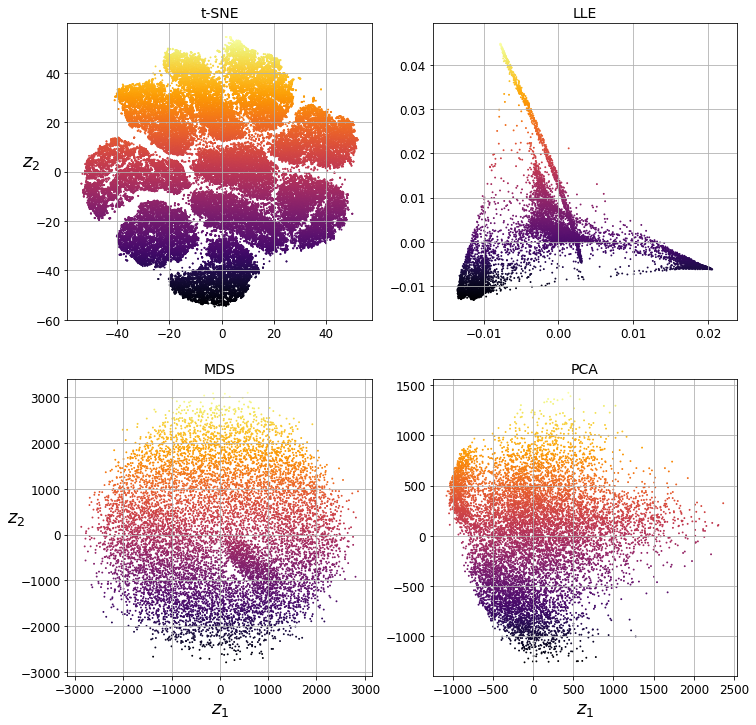

In [71]:
titles = ["t-SNE",'LLE','MDS','PCA']
Xs = [X_tsne, X_lle, X_mds, X_pca2]
plt.figure(figsize=(12,12))

for subplot, title, X_reduced in zip((221, 222, 223, 224), titles, Xs):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=X_reduced[:, 1], s=0.8, cmap=plt.cm.inferno)
    if subplot in (223,224):
        plt.xlabel("$z_1$", fontsize=18)
    if subplot in (221,223):
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()